# Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk


In [2]:
df = pd.read_csv(r"oversample-binarydata-train.csv")

In [3]:
df1=pd.read_csv(r"oversample-binarydata-test.csv")

In [4]:
count=df['target'].value_counts()
count

0    101
1    101
Name: target, dtype: int64

In [5]:
df.head()

,Unnamed: 0,body,target
0,0,"It's insane to know I did it, I just came out ...",0
1,1,"For the last two and a half years, I've devote...",0
2,2,I found this to be a moving experience. In my ...,0
3,3,"First off, I want to apologize if this is the ...",0
4,4,*topic*,0


In [7]:
df = df[['body', 'target']]

df.head()

,body,target
0,"It's insane to know I did it, I just came out ...",0
1,"For the last two and a half years, I've devote...",0
2,I found this to be a moving experience. In my ...,0
3,"First off, I want to apologize if this is the ...",0
4,*topic*,0


In [8]:
df.shape

(202, 2)

# Data Analysis

In [9]:
df.isnull().sum()

body      0
target    0
dtype: int64

# Data Preprocessing

In [10]:
from nltk.corpus import stopwords
#nltk.download('stopwords')

stopwords = stopwords.words('english')

In [11]:
stemmer = nltk.PorterStemmer()

In [12]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
#nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

In [13]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\n|\t', '', text)
    text = re.sub('\d', '', text) ##
    text = re.sub(r'[^\w\s]', ' ', text) ##
    text = [word for word in text.split() if word not in stopwords] 
    text = [stemmer.stem(word) for word in text]
    
    text = " ".join(text)
    
    return text
    

In [14]:
df['clean'] = df['body'].apply(preprocess)
df1['clean'] = df1['body'].apply(preprocess)

In [15]:
avg_len = df['body'].str.len().mean()
avg_word_count = df['body'].str.split().str.len().mean()
avg_len1 = df1['body'].str.len().mean()
avg_word_count1 = df1['body'].str.split().str.len().mean()

print('Original Tweets: ')
print(int(avg_len))
print(int(avg_word_count))


avg_clean_len = df['clean'].str.len().mean()
avg_clean_word_count = df['clean'].str.split().str.len().mean()
avg_clean_len1 = df1['clean'].str.len().mean()
avg_clean_word_count1 = df1['clean'].str.split().str.len().mean()
print('Preprocessed comments: ')
print(int(avg_clean_len))
print(int(avg_clean_word_count))


Original Tweets: 
1115
202
Preprocessed comments: 
554
92


Text(0.5, 1.0, 'Avg length of comments')

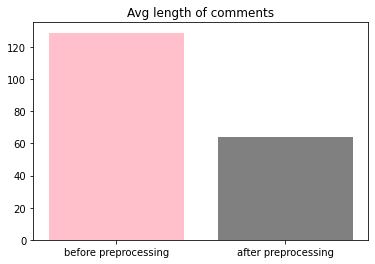

In [16]:
y = [129, 64]
x  = ['before preprocessing', 'after preprocessing']

plt.bar(x, y, color = ['pink', 'gray'])
plt.title('Avg length of comments')

Text(0.5, 1.0, 'Avg word count of comments')

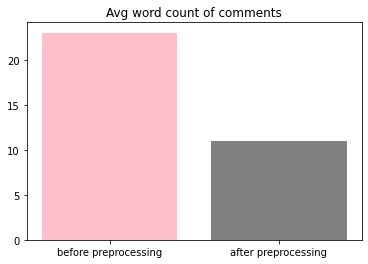

In [17]:

y = [23, 11]
x  = ['before preprocessing', 'after preprocessing']

plt.bar(x, y, color = ['pink', 'gray'])
plt.title('Avg word count of comments')

# Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [19]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df=2, max_features = 157, stop_words='english')

bow = bow_vectorizer.fit_transform(df['clean'])


In [20]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df=2, max_features = 157, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(df['clean'])


# Dataset splitting

In [21]:
from sklearn.model_selection import train_test_split

#X1_train, X1_test, y1_train, y1_test = train_test_split(bow, df["target"], test_size = 0.25, random_state = 0)
#X1_train=bow.head(400)
X1_train=bow

X1_test=df1['clean']
X1_test = bow_vectorizer.transform(X1_test)

y1_train=df["target"]
y1_test=df1["target"]

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)


(202, 157)
(202,)
(40, 157)
(40,)


In [22]:
from sklearn.model_selection import train_test_split

#X2_train, X2_test, y2_train, y2_test = train_test_split(tfidf, df["target"], test_size = 0.25, random_state = 0)

X2_train=tfidf

X2_test= df1['clean']
X2_test = tfidf_vectorizer.transform(X2_test)

y2_train=df["target"]
y2_test=df1["target"]

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)


(202, 157)
(202,)
(40, 157)
(40,)


# Model Training

In [23]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
# from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# MLP

In [24]:
from sklearn.model_selection import GridSearchCV
import numpy as np

rf = MLPClassifier()
batch_size = np.arange(10,100,10)
learn_rate = np.arange(0.001,0.3)
#epochs = [10, 50, 100]
#param_grid = dict(batch_size=batch_size, learning_rate_init=learn_rate)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid1 = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=5)
grid_result = grid1.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.3f"
      % (grid1.best_params_, grid1.best_score_))

The best parameters are {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'} with a score of 0.838


C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
#model1 = MLPClassifier(max_iter=500, activation='relu' ,batch_size=60, learning_rate_init=0.001)

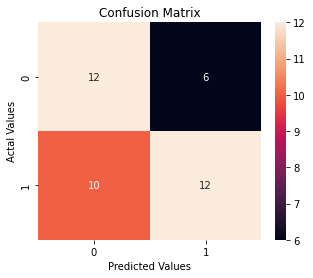

In [26]:
#model1.fit(X1_train, y1_train)  

y1_pred = grid1.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)

In [27]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60        18
           1       0.67      0.55      0.60        22

    accuracy                           0.60        40
   macro avg       0.61      0.61      0.60        40
weighted avg       0.61      0.60      0.60        40



In [28]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

#from utils.plot_ROC_Curve import plot_roc_pr

#plot_roc_pr(y_pred = y1_pred, y_test = y1_test)


In [29]:
#!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt
import matplotlib.pyplot as plt

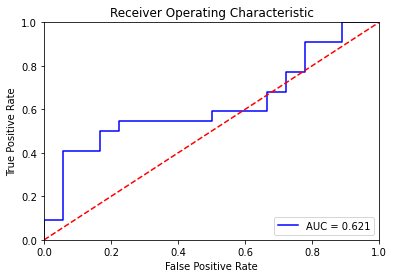

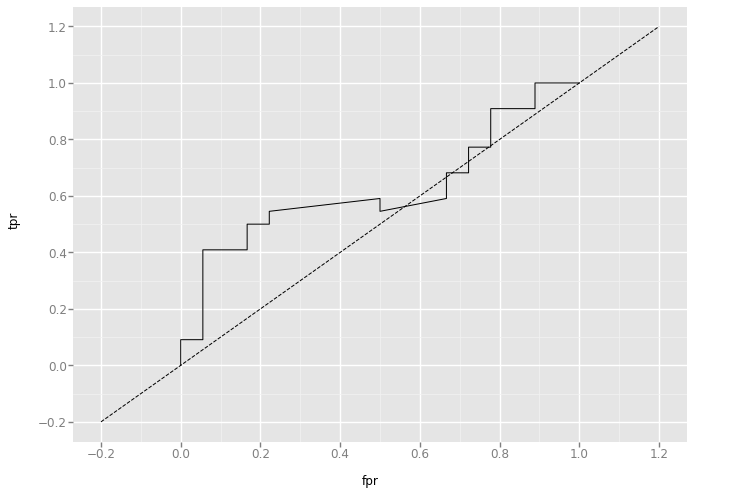

<ggplot: (120169261572)>

In [30]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid1.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.600 auc=0.712


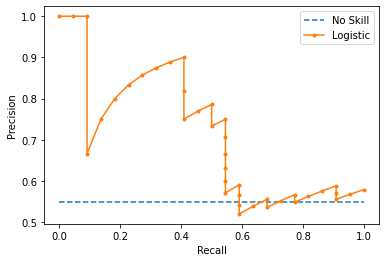

In [31]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid1.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid1.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [32]:
from sklearn.metrics import balanced_accuracy_score

print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.606060606060606


C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


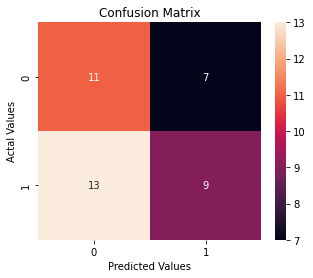

In [33]:
grid1.fit(X2_train, y2_train)
y2_pred = grid1.predict(X2_test)
#grid1.fit(X2_train, y2_train)

y2_pred = grid1.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)

#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [34]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.46      0.61      0.52        18
           1       0.56      0.41      0.47        22

    accuracy                           0.50        40
   macro avg       0.51      0.51      0.50        40
weighted avg       0.52      0.50      0.50        40



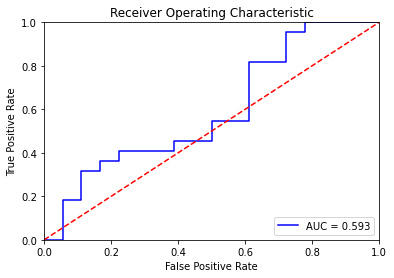

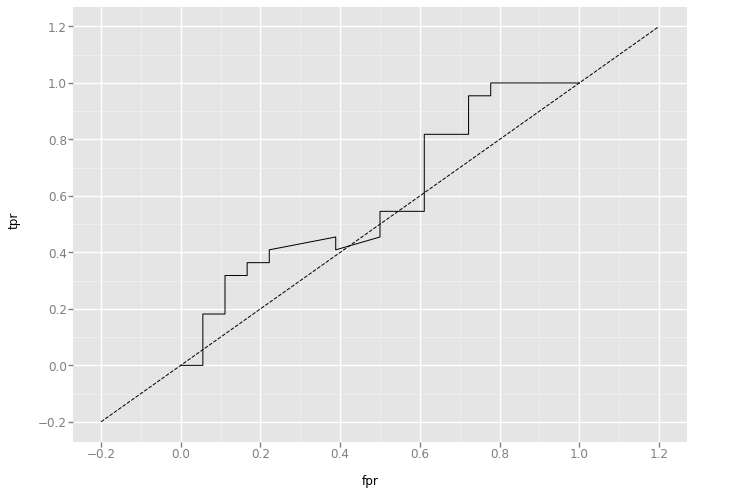

<ggplot: (120194752669)>

In [35]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid1.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.474 auc=0.610


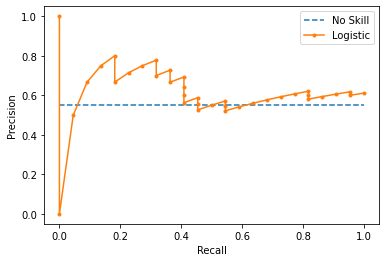

In [36]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid1.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid1.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [37]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.5101010101010102


# Random forest

In [38]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
#n_depth_range = np.arange(1,32)
min_samples_split=np.arange(0.1,1.0)
criterion=['gini', 'entropy', 'log_loss']
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range,min_samples_split=min_samples_split,criterion=criterion)

rf = RandomForestClassifier()

grid2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid2.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid2.best_params_, grid2.best_score_))

The best parameters are {'criterion': 'entropy', 'max_features': 2, 'min_samples_split': 0.1, 'n_estimators': 80} with a score of 0.82


C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\siagu\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterat

In [39]:
#model2 = RandomForestClassifier(n_estimators=50, max_features=5)

C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\siagu\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterat

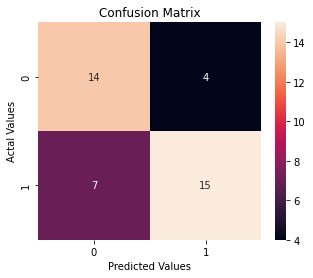

In [40]:
grid2.fit(X1_train, y1_train)  

y1_pred = grid2.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)


In [41]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        18
           1       0.79      0.68      0.73        22

    accuracy                           0.73        40
   macro avg       0.73      0.73      0.72        40
weighted avg       0.73      0.72      0.73        40



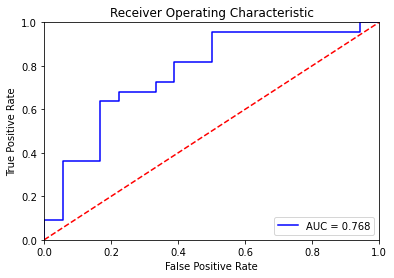

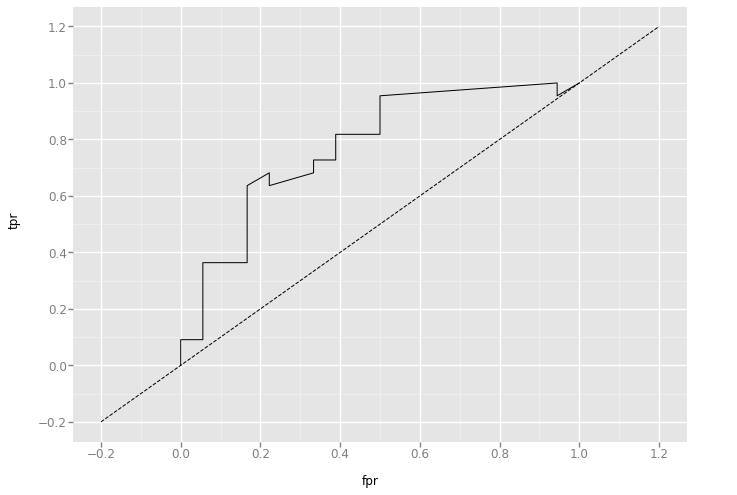

<ggplot: (120196051098)>

In [42]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid2.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.732 auc=0.778


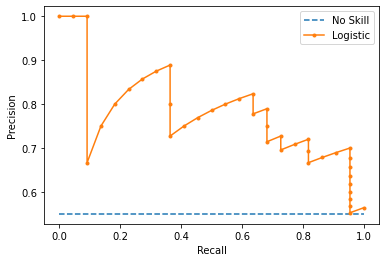

In [43]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid2.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid2.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [44]:
print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.7297979797979798


C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\siagu\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterat

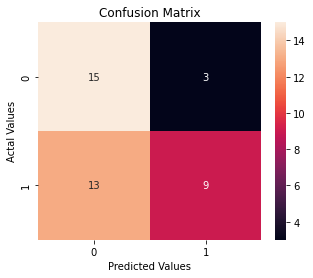

In [45]:
grid2.fit(X2_train, y2_train)

y2_pred = grid2.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [46]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.54      0.83      0.65        18
           1       0.75      0.41      0.53        22

    accuracy                           0.60        40
   macro avg       0.64      0.62      0.59        40
weighted avg       0.65      0.60      0.58        40



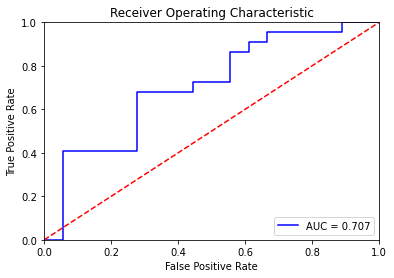

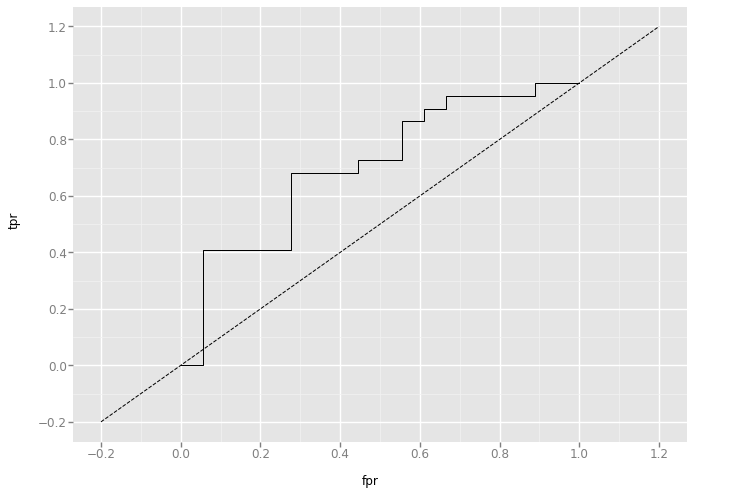

<ggplot: (120194736415)>

In [47]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid2.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.529 auc=0.693


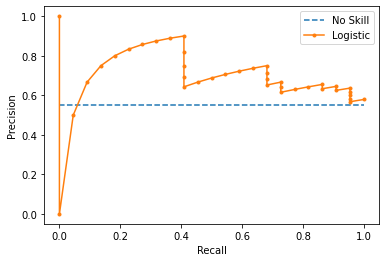

In [48]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid2.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid2.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [49]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.6212121212121212


# Decision Tree

In [50]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
max_depth_range = np.arange(1,32)
criterion=['gini', 'entropy', 'log_loss']
min_samples_split=np.arange(0.1,1.0)
param_grid = dict(max_features=max_features_range, max_depth=max_depth_range,criterion=criterion,min_samples_split=min_samples_split)

rf = DecisionTreeClassifier()

grid3 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid3.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid3.best_params_, grid3.best_score_))

The best parameters are {'criterion': 'entropy', 'max_depth': 13, 'max_features': 3, 'min_samples_split': 0.1} with a score of 0.74


C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
775 fits failed out of a total of 2325.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
775 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CL

In [51]:
#model3 = DecisionTreeClassifier(max_depth=4, max_features=3) 

C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
775 fits failed out of a total of 2325.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
775 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CL

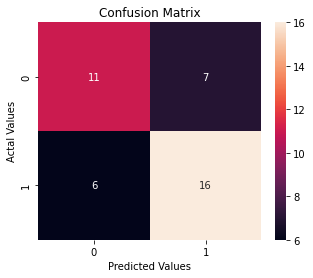

In [52]:
grid3.fit(X1_train, y1_train)  

y1_pred = grid3.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [53]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63        18
           1       0.70      0.73      0.71        22

    accuracy                           0.68        40
   macro avg       0.67      0.67      0.67        40
weighted avg       0.67      0.68      0.67        40



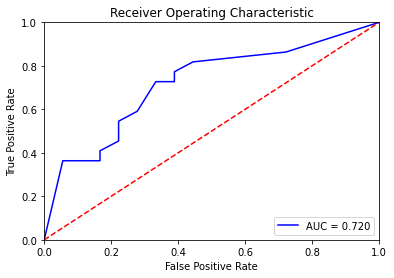

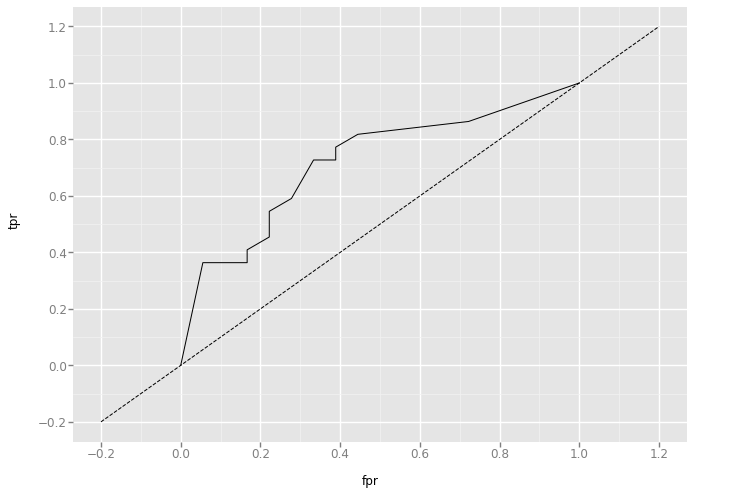

<ggplot: (120196353645)>

In [55]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid3.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.711 auc=0.780


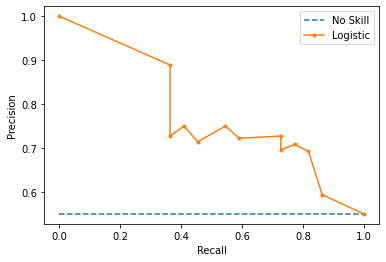

In [56]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid3.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid3.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [57]:
print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.6691919191919192


C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
775 fits failed out of a total of 2325.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
775 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CL

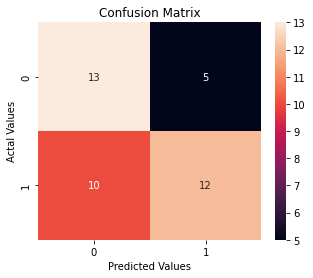

In [58]:
grid3.fit(X2_train, y2_train)

y2_pred = grid3.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [59]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.57      0.72      0.63        18
           1       0.71      0.55      0.62        22

    accuracy                           0.62        40
   macro avg       0.64      0.63      0.62        40
weighted avg       0.64      0.62      0.62        40



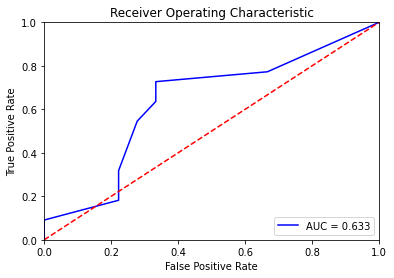

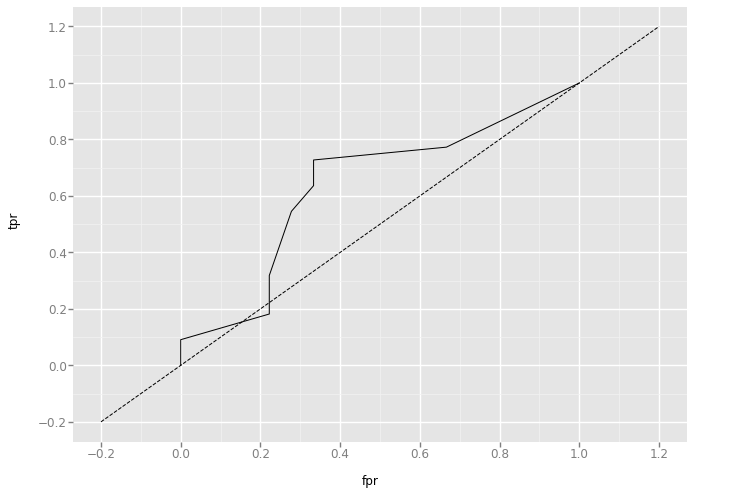

<ggplot: (120196143177)>

In [60]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid3.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.615 auc=0.677


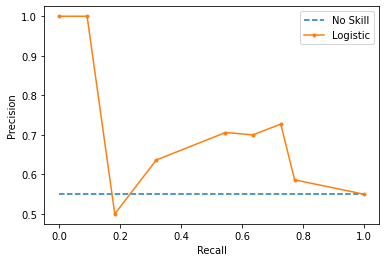

In [61]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid3.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid3.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [62]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.6338383838383839


# SVM

In [63]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'kernel': ['linear','rbf'],
                'class_weight':['balanced', None]} 
rf=SVC(probability=True)
grid4 = GridSearchCV(estimator=rf, param_grid=param_grid, refit = True, verbose = 3, cv=5)
  
# fitting the model for grid search
grid4.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid4.best_params_, grid4.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.725 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.775 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel

[CV 3/5] END C=0.1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.725 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.775 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=rbf;, score=0.488 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=rbf;, score=0.488 total time=   0.0s
[CV 3/5] END C=0.1

[CV 4/5] END C=1, class_weight=None, gamma=0.01, kernel=linear;, score=0.875 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.01, kernel=linear;, score=0.825 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.610 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, ke

[CV 5/5] END C=10, class_weight=None, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END C=10, class_weight=None, gamma=0.1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=10, class_weight=None, gamma=0.1, kernel=linear;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, class_weight=None, gamma=0.1, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/5] END C=10, class_weight=None, gamma=0.1, kernel=linear;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, class_weight=None, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 3/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.825 total time=   0.0s
[CV 4/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END C=10, class_weight=None, gamma=0.1, kernel=r

[CV 5/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.725 total time=   0.0s
[CV 1/5] END C=100, class_weight=None, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=100, class_weight=None, gamma=1, kernel=linear;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, class_weight=None, gamma=1, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/5] END C=100, class_weight=None, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, class_weight=None, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.854 total time=   0.0s
[CV 3/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END C=100, class_weight=None, gamma=1, kernel=r

[CV 1/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.756 total time=   0.0s
[CV 2/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.780 total time=   0.0s
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.850 total time=   0.0s
[CV 4/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rb

In [64]:
#model4 = SVC(C=10,gamma=0.1, max_iter=4000)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.725 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.775 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel

[CV 2/5] END C=0.1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.488 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.707 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.725 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.775 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=rbf;, score=0.488 total time=   0.0s
[CV 2/5] END C=0.1,

[CV 4/5] END C=1, class_weight=None, gamma=0.01, kernel=linear;, score=0.875 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.01, kernel=linear;, score=0.825 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.610 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, ke

[CV 5/5] END C=10, class_weight=None, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END C=10, class_weight=None, gamma=0.1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=10, class_weight=None, gamma=0.1, kernel=linear;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, class_weight=None, gamma=0.1, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/5] END C=10, class_weight=None, gamma=0.1, kernel=linear;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, class_weight=None, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 3/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.825 total time=   0.0s
[CV 4/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END C=10, class_weight=None, gamma=0.1, kernel=r

[CV 1/5] END C=100, class_weight=None, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=100, class_weight=None, gamma=1, kernel=linear;, score=0.732 total time=   0.0s
[CV 3/5] END C=100, class_weight=None, gamma=1, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/5] END C=100, class_weight=None, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 5/5] END C=100, class_weight=None, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.854 total time=   0.0s
[CV 3/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END C=100, class_weight=None, gamma=0.1, kernel=linear;,

[CV 2/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=rbf;, score=0.756 total time=   0.0s
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=rbf;, score=0.850 total time=   0.0s
[CV 4/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=rbf;, score=0.825 total time=   0.0s
[CV 5/5] END C=1000, class_weight=balanced, gamma=0.001, kernel=rbf;, score=0.775 total time=   0.0s
[CV 1/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.732 total time=   0.0s
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.875 total time=   0.0s
[CV 5/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, 

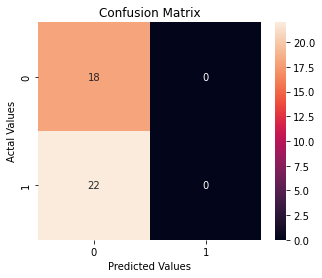

In [65]:
grid4.fit(X1_train, y1_train)  

y1_pred = grid4.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#print(cm)


In [66]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        18
           1       0.00      0.00      0.00        22

    accuracy                           0.45        40
   macro avg       0.23      0.50      0.31        40
weighted avg       0.20      0.45      0.28        40



C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


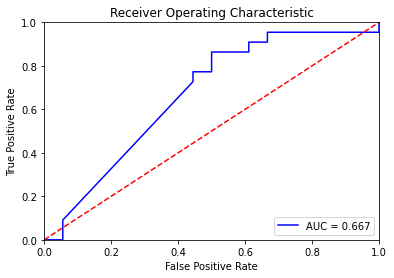

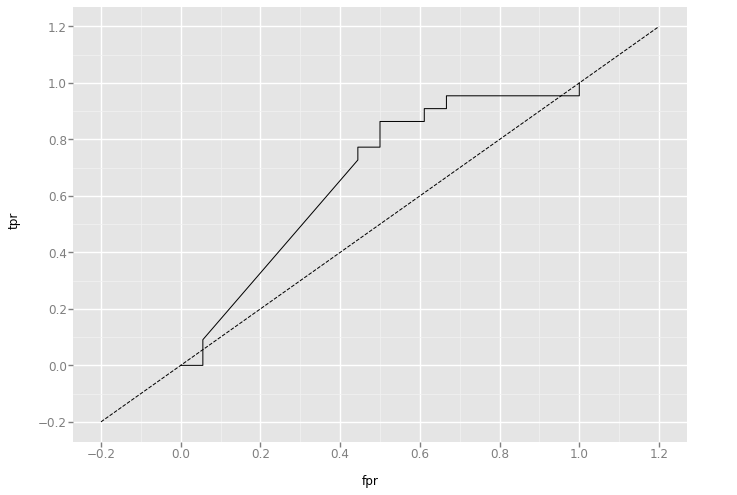

<ggplot: (120196103003)>

In [67]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid4.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.000 auc=0.636


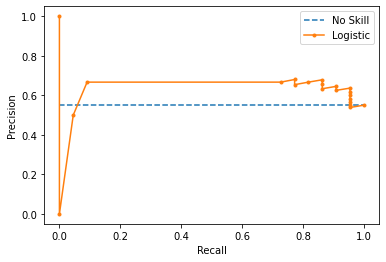

In [68]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid4.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid4.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [69]:
print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.5


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.512 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.512 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.700 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel

[CV 3/5] END C=0.1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.850 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.488 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.488 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=linear;, score=0.700 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=rbf;, score=0.488 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, gamma=0.0001, kernel=rbf;, score=0.488 total time=   0.0s
[CV 3/5] END C=0.1

[CV 4/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.732 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.825 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.825 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.488 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.488 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=rbf;, score=0.850 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.00

[CV 2/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 3/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 4/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 5/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5] END C=10, class_weight=None, gamma=0.01, kernel=linear;, score=0.829 total time=   0.0s
[CV 2/5] END C=10, class_weight=None, gamma=0.01, kernel=linear;, score=0.634 total time=   0.0s
[CV 3/5] END C=10, class_weight=None, gamma=0.01, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END C=10, class_weight=None, gamma=0.01, kernel=linear;, score=0.900 total time=   0.0s
[CV 5/5] END C=10, class_weight=None, gamma=0.01, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END C=10, class_weight=None, gamma=0.01,

[CV 1/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 2/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 3/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 5/5] END C=100, class_weight=None, gamma=1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 1/5] END C=100, class_weight=None, gamma=0.1, kernel=linear;, score=0.829 total time=   0.0s
[CV 2/5] END C=100, class_weight=None, gamma=0.1, kernel=linear;, score=0.634 total time=   0.0s
[CV 3/5] END C=100, class_weight=None, gamma=0.1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END C=100, class_weight=None, gamma=0.1, kernel=linear;, score=0.925 total time=   0.0s
[CV 5/5] END C=100, class_weight=None, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END C=100, class_weight=None, gamma=0.1, kerne

[CV 2/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.634 total time=   0.0s
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.925 total time=   0.0s
[CV 5/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.659 total time=   0.0s
[CV 3/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.850 total time=   0.0s
[CV 4/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score

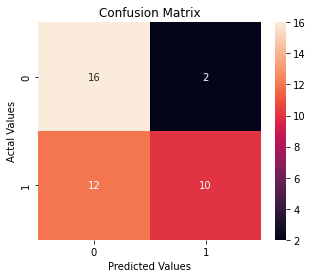

In [70]:
grid4.fit(X2_train, y2_train)

y2_pred = grid4.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [71]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.57      0.89      0.70        18
           1       0.83      0.45      0.59        22

    accuracy                           0.65        40
   macro avg       0.70      0.67      0.64        40
weighted avg       0.72      0.65      0.64        40



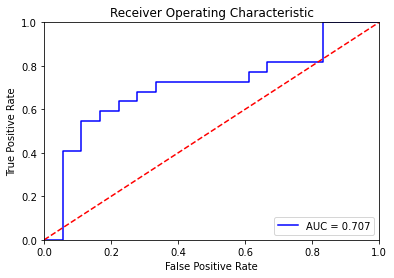

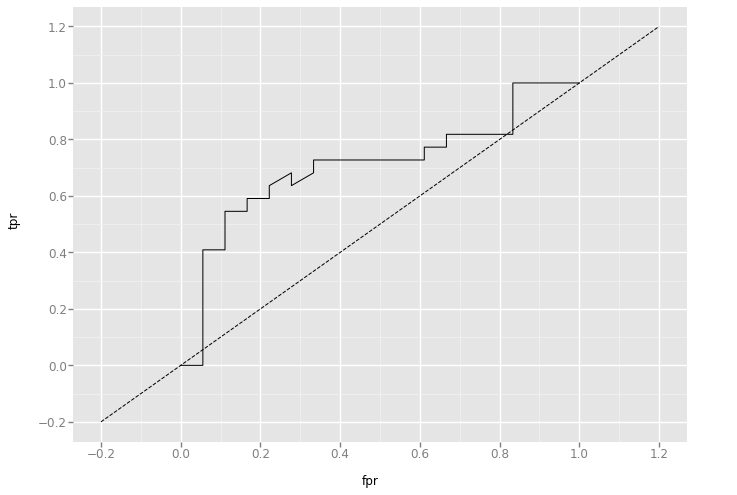

<ggplot: (120196793010)>

In [72]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid4.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.615 auc=0.712


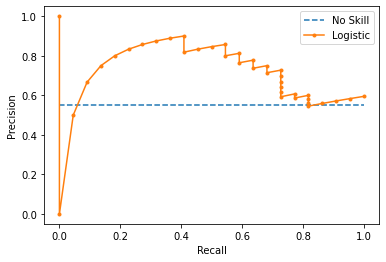

In [73]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid4.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid3.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [74]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.6717171717171717
